In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
air_quality = pd.read_csv("NYC_Air_Quality.csv")
print(air_quality)

       Unique ID  Indicator ID                  Name Measure Measure Info  \
0         216498           386            Ozone (O3)    Mean          ppb   
1         216499           386            Ozone (O3)    Mean          ppb   
2         219969           386            Ozone (O3)    Mean          ppb   
3         219970           386            Ozone (O3)    Mean          ppb   
4         164876           383  Sulfur Dioxide (SO2)    Mean          ppb   
...          ...           ...                   ...     ...          ...   
16117     671118           386            Ozone (O3)    Mean          ppb   
16118     671119           386            Ozone (O3)    Mean          ppb   
16119     671120           386            Ozone (O3)    Mean          ppb   
16120     671121           386            Ozone (O3)    Mean          ppb   
16121     671122           386            Ozone (O3)    Mean          ppb   

      Geo Type Name  Geo Join ID                          Geo Place Name  \

In [9]:
air_quality = air_quality[
    (air_quality['Name'] == 'Fine Particulate Matter (PM2.5)')
    & (air_quality['Geo Place Name'].isin(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']))
    & (pd.to_datetime(air_quality['Start_Date']) >= pd.to_datetime('1/01/2016'))
]

In [10]:
print(air_quality)

       Unique ID  Indicator ID                             Name Measure  \
10228     410721           365  Fine Particulate Matter (PM2.5)    Mean   
10231     410724           365  Fine Particulate Matter (PM2.5)    Mean   
10234     410727           365  Fine Particulate Matter (PM2.5)    Mean   
10237     410730           365  Fine Particulate Matter (PM2.5)    Mean   
10240     410733           365  Fine Particulate Matter (PM2.5)    Mean   
...          ...           ...                              ...     ...   
15848     669849           365  Fine Particulate Matter (PM2.5)    Mean   
15849     669850           365  Fine Particulate Matter (PM2.5)    Mean   
15850     669851           365  Fine Particulate Matter (PM2.5)    Mean   
15851     669852           365  Fine Particulate Matter (PM2.5)    Mean   
15852     669853           365  Fine Particulate Matter (PM2.5)    Mean   

              Measure Info Geo Type Name  Geo Join ID Geo Place Name  \
10228  mcg per cubic meter 

In [11]:
# Calculate the average PM2.5 concentration for each borough
borough_averages = air_quality.groupby('Geo Place Name')['Data Value'].mean()

# Create a new cleaned dataframe with the borough and average PM2.5 columns
air_quality_cleaned = pd.DataFrame({
    'borough': borough_averages.index.to_list(),
    'average_pm2.5': borough_averages.to_list()
})

In [12]:
print(air_quality_cleaned)

         borough  average_pm2.5
0          Bronx       7.750769
1       Brooklyn       7.678462
2      Manhattan       8.966923
3         Queens       7.421538
4  Staten Island       6.931538


In [13]:
air_quality_cleaned.to_csv("air_quality_cleaned.csv")

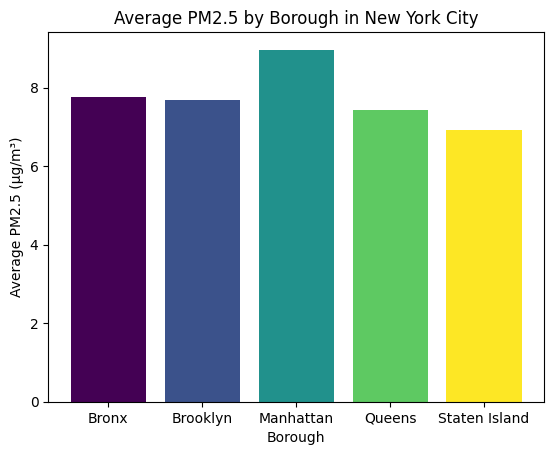

In [19]:
colors = plt.cm.viridis(np.linspace(0, 1, len(air_quality_cleaned)))

plt.bar(air_quality_cleaned['borough'], air_quality_cleaned['average_pm2.5'], color=colors)

# Set the chart title and labels
plt.title('Average PM2.5 by Borough in New York City')
plt.xlabel('Borough')
plt.ylabel('Average PM2.5 (μg/m³)')

# Show the chart
plt.show()